In [ ]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -qq /content/drive/MyDrive/flower/test.zip  -d /content/drive/MyDrive/flower/test

In [ ]:
!unzip -qq /content/drive/MyDrive/flower/train.zip -d /content/drive/MyDrive/flower/train/

In [ ]:
path="/content/drive/MyDrive/flower/train_label.csv"

file = open( path, 'w')

for  i in  range(1, 801):
    file.write( str(1) + '\n') # 튤립
for i  in  range(801, 1360):                       
    file.write( str(0) + '\n') # 해바라기

file.close()

In [ ]:
path="/content/drive/MyDrive/flower/test_label.csv"

file = open( path, 'w')

for  i in  range(1, 51):
    file.write( str(1) + '\n') # 튤립
for i  in  range(51, 101):                       
    file.write( str(0) + '\n') # 해바라기

file.close()

In [ ]:
import os
import re
import cv2
import numpy as np

def image_load(path):
    file_list = os.listdir(path)
    file_name=[]

    for  i  in  file_list:
        a = int( re.sub('[^0-9]','', i) )   # i 가 숫자가 아니면 null 로 변경해라 ~
        file_name.append(a)
    file_name.sort() # 정렬작업 
    
    file_res=[]
    for  j  in  file_name:
        file_res.append('%s/%d.jpg' %(path,j) )
        
    image=[]
    for  k  in  file_res:
        img = cv2.imread(k)
        image.append(img)
    
    return  np.array(image)

In [ ]:
import csv

def  label_load(path):
    file = open(path)
    labeldata = csv.reader(file)
    labellist = []
    for  i  in  labeldata:
        labellist.append(int(i[0]))

    return   np.array(labellist)

In [ ]:
import  cv2
import  os 
import  numpy  as np

path = "/content/drive/MyDrive/flower/train/"
file_list = os.listdir(path)   # 파일이름 불러오는 부분 

for k in file_list:     # 리스트안에 있는 파일들을 하나씩 빼내는 코드 
    img = cv2.imread(path + '/' + k) # 사진을 숫자행렬로 변경합니다. 
                                                   # (165, 201, 3)
    width, height = img.shape[:2]  # 사진 숫자 행렬에서 가로,세로 가져온다.
    resize_img = cv2.resize(img, (32 , 32), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('/content/drive/MyDrive/flower/train_resize/' + k, resize_img)   # resize 한 이미지를 저장합니 
    

In [ ]:
import  cv2
import  os 
import  numpy  as np

path = "/content/drive/MyDrive/flower/test/"
file_list = os.listdir(path)   # 파일이름 불러오는 부분 

for k in file_list:     # 리스트안에 있는 파일들을 하나씩 빼내는 코드 
    img = cv2.imread(path + '/' + k) # 사진을 숫자행렬로 변경합니다. 
                                                   # (165, 201, 3)
    width, height = img.shape[:2]  # 사진 숫자 행렬에서 가로,세로 가져온다.
    resize_img = cv2.resize(img, (32 , 32), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('/content/drive/MyDrive/flower/test_resize/' + k, resize_img)   # resize 한 이미지를 저장합니 
    

In [ ]:
# 1. 튤립과 해바라기 데이터를 불러옵니다.

# 이미지 데이터와 라벨위치 
train_image = '/content/drive/MyDrive/flower/train_resize/'
test_image = '/content/drive/MyDrive/flower/test_resize/'
train_label = '/content/drive/MyDrive/flower/train_label.csv'
test_label = '/content/drive/MyDrive/flower/test_label.csv'

# 데이터 로드 
x_train = image_load(train_image)
y_train = label_load(train_label)
x_test = image_load(test_image)
y_test = label_load(test_label)     

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1359, 32, 32, 3)
(100, 32, 32, 3)
(1359,)
(100,)


In [ ]:
# 드롭아웃 적용하기

# 1. 필요한 패키지 가져오는 코드 

import tensorflow as tf   # 텐써 플로우 2.0 
from tensorflow.keras.models import Sequential  # 모델을 구성하기 위한 모듈
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D ,Flatten
from tensorflow.keras.utils import to_categorical # one encoding 하는 모듈

tf.random.set_seed(777)

    
# 2. 정규화 진행  
x_train = x_train.reshape(-1, 32, 32, 3) / 255   # 4차원으로 변경하고 정규화
x_test = x_test.reshape(-1, 32,32, 3) / 255


# 3. 정답 데이터를 준비한다. 
# 하나의 숫자를 one hot encoding 한다. (예:  4 ---> 0 0 0 0 1 0 0 0 0 0 ) 
y_train = to_categorical(y_train)  # 훈련 데이터의 라벨(정답)을 원핫 인코딩
y_test = to_categorical(y_test)    # 테스트 데이터의 라벨(정답)을 원핫 인코딩 

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1359, 32, 32, 3)
(100, 32, 32, 3)
(1359, 2)
(100, 2)


Epoch 1/200
14/14 [==============================] - 2s 47ms/step - loss: 0.7110 - acc: 0.6917 - val_loss: 0.5147 - val_acc: 0.7600
Epoch 2/200
14/14 [==============================] - 0s 31ms/step - loss: 0.5209 - acc: 0.7851 - val_loss: 0.6478 - val_acc: 0.5700
Epoch 3/200
14/14 [==============================] - 0s 27ms/step - loss: 0.4742 - acc: 0.8219 - val_loss: 0.5239 - val_acc: 0.7100
Epoch 4/200
14/14 [==============================] - 0s 26ms/step - loss: 0.4425 - acc: 0.8308 - val_loss: 0.3271 - val_acc: 0.9100
Epoch 5/200
14/14 [==============================] - 0s 25ms/step - loss: 0.4261 - acc: 0.8263 - val_loss: 0.2666 - val_acc: 0.9500
Epoch 6/200
14/14 [==============================] - 0s 26ms/step - loss: 0.4107 - acc: 0.8447 - val_loss: 0.2514 - val_acc: 0.9400
Epoch 7/200
14/14 [==============================] - 0s 26ms/step - loss: 0.3815 - acc: 0.8492 - val_loss: 0.2411 - val_acc: 0.9400
Epoch 8/200
14/14 [==============================] - 0s 26ms/step - loss: 0.

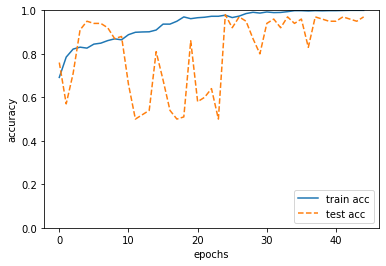

In [ ]:

# 4. 모델을 구성합니다. 3층 신경망으로 구성
model = Sequential()
model.add( Conv2D(100, kernel_size=(5,5),input_shape=(32,32,3), activation='relu', padding='same') )
model.add( MaxPooling2D(pool_size=(2, 2), padding='same') )
model.add( Conv2D(100, kernel_size=(5,5), activation='relu', padding='same') )
model.add( MaxPooling2D(pool_size=(2, 2), padding='same') )


model.add( Flatten() )
model.add(Dense(100, activation = 'relu', input_shape = (32*32, )))  # 1층
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(100, activation = 'relu') ) # 2층 은닉층 
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))  # 3층 출력층 


# 5. 모델을 설정합니다. ( 경사하강법, 오차함수를 정의해줍니다. )
model.compile(optimizer='Adam', 
              loss = 'binary_crossentropy', 
              metrics=['acc'])  # 학습과정에서 정확도를 보려고 

#6. 모델을 훈련시킵니다. 
from tensorflow.keras.callbacks import EarlyStopping

# 콜백을 정의합니다.
callbacks = [EarlyStopping(monitor = 'val_acc', patience = 20, verbose = 1)]

# callbacks 인자를 통해 정의한 콜백을 전달합니다.
history= model.fit(x_train, y_train,
         batch_size = 100,
         validation_data = (x_test, y_test),
         epochs = 200 ,
         callbacks = callbacks)

# 7.모델을 평가합니다. (오차, 정확도가 출력됩니다.)
model.evaluate(x_test, y_test)  #훈련: 1.0, 테스트: 0.97


# 8. 시각화
train_acc_list=history.history['acc']
train_acc_list

test_acc_list=history.history['val_acc']
test_acc_list


import  matplotlib.pyplot  as  plt

x = np.arange( len(train_acc_list) )
plt.plot( x, train_acc_list, label='train acc')
plt.plot( x, test_acc_list, label='test acc',  linestyle='--')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

model.save('/content/drive/MyDrive/flower/flower_model2.h5')

In [ ]:
# 모델을 불러와서 새로운 모델로 구성하고 이파리 이미지 한장 예측하기

# 1. 모델을 불러옵니다.
from tensorflow.keras.models import load_model

new_model = load_model('/content/drive/MyDrive/flower/flower_model2.h5')

# 2.모델을 평가합니다. (오차, 정확도가 출력됩니다.)

new_model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 7ms/step - loss: 0.1713 - acc: 0.9700


[0.17132534086704254, 0.9700000286102295]

In [ ]:
import tensorflow as  tf
import cv2

img_path = '/content/drive/MyDrive/flower/img/87.jpg'

img = cv2.imread(img_path)
#img = cv2.bitwise_not(img)
print(img.shape)

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

resized_images=tf.image.resize_images(img, (32, 32))
print(resized_images.shape)

(225, 187, 3)
(32, 32, 3)


In [ ]:
import numpy as np

x2 =tf.reshape(resized_images, [-1,32,32,3])
print(x2.shape)

from tensorflow.keras.models import load_model

new_model = load_model('/content/drive/MyDrive/flower/flower_model2.h5')

results = new_model.predict(x2,steps=1)
np.argmax(results)  # 1 이 튤립, 0 이 해바라기

(1, 32, 32, 3)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0

In [ ]:
import tensorflow as  tf
import cv2

img_path = '/content/drive/MyDrive/fruit/img/test.jpg'

img = cv2.imread(img_path)
img = cv2.bitwise_not(img)
print(img.shape)

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

resized_images2=tf.image.resize_images(img, (32, 32))
print(resized_images2.shape)

(225, 260, 3)
(32, 32, 3)


In [ ]:
import numpy as np

x2 =tf.reshape(resized_images, [-1,32,32,3])
print(x2.shape)

from tensorflow.keras.models import load_model

new_model = load_model('fruit_model2.h5')

results = new_model.predict(x2,steps=1)
np.argmax(results) # 1 이 파이애플, 0 이 사과

In [ ]:
###################### VGG 신경망 ############################
from tensorflow.keras.applications import VGG16
vgg16 = VGG16(weights = 'imagenet', input_shape = (32, 32, 3), include_top = False)

58900480/58889256 [==============================] - 1s 0us/step


(1359, 32, 32, 3)
(100, 32, 32, 3)
(1359, 2)
(100, 2)
Epoch 1/200
14/14 [==============================] - 38s 222ms/step - loss: 0.5766 - acc: 0.7660 - val_loss: 0.4480 - val_acc: 0.8700
Epoch 2/200
14/14 [==============================] - 1s 106ms/step - loss: 0.3040 - acc: 0.8926 - val_loss: 0.2780 - val_acc: 0.9500
Epoch 3/200
14/14 [==============================] - 1s 106ms/step - loss: 0.2708 - acc: 0.9102 - val_loss: 0.1602 - val_acc: 1.0000
Epoch 4/200
14/14 [==============================] - 2s 108ms/step - loss: 0.2112 - acc: 0.9308 - val_loss: 0.1644 - val_acc: 0.9400
Epoch 5/200
14/14 [==============================] - 1s 105ms/step - loss: 0.1736 - acc: 0.9433 - val_loss: 0.0813 - val_acc: 1.0000
Epoch 6/200
14/14 [==============================] - 2s 108ms/step - loss: 0.1574 - acc: 0.9573 - val_loss: 0.1094 - val_acc: 1.0000
Epoch 7/200
14/14 [==============================] - 1s 105ms/step - loss: 0.1417 - acc: 0.9581 - val_loss: 0.1104 - val_acc: 1.0000
Epoch 8/200
14

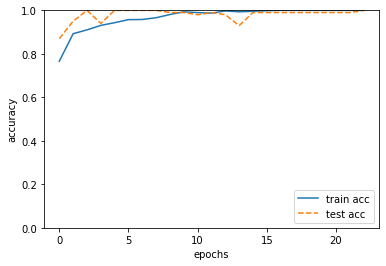

In [ ]:
# 드롭아웃 적용하기

# 1. 필요한 패키지 가져오는 코드 
import tensorflow as tf   # 텐써 플로우 2.0 
from tensorflow.keras.models import Sequential  # 모델을 구성하기 위한 모듈
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D ,Flatten
from tensorflow.keras.utils import to_categorical # one encoding 하는 모듈
from tensorflow.keras.optimizers import Adam

tf.random.set_seed(777)
    
# 2. 정규화 진행  
x_train = x_train.reshape(-1, 32, 32, 3) / 255   # 4차원으로 변경하고 정규화
x_test = x_test.reshape(-1, 32,32, 3) / 255


# 3. 정답 데이터를 준비한다. 
# 하나의 숫자를 one hot encoding 한다. (예:  4 ---> 0 0 0 0 1 0 0 0 0 0 ) 
y_train = to_categorical(y_train)  # 훈련 데이터의 라벨(정답)을 원핫 인코딩
y_test = to_categorical(y_test)    # 테스트 데이터의 라벨(정답)을 원핫 인코딩 

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
    

# 4. 모델을 구성합니다. 3층 신경망으로 구성
model = Sequential()
model.add(vgg16)

model.add( Flatten() )
model.add(Dense(100, activation = 'relu', input_shape = (32*32, )))  # 1층
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(100, activation = 'relu') ) # 2층 은닉층 
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))  # 3층 출력층 

# 5. 모델을 설정합니다. ( 경사하강법, 오차함수를 정의해줍니다. )
model.compile(optimizer=Adam(1e-4), 
              loss = 'binary_crossentropy', 
              metrics=['acc'])  # 학습과정에서 정확도를 보려고 

#6. 모델을 훈련시킵니다. 
from tensorflow.keras.callbacks import EarlyStopping

# 콜백을 정의합니다.
callbacks = [EarlyStopping(monitor = 'val_acc', patience = 20, verbose = 1)]

# callbacks 인자를 통해 정의한 콜백을 전달합니다.
history= model.fit(x_train, y_train,
         batch_size = 100,
         validation_data = (x_test, y_test),
         epochs = 200 ,
         callbacks = callbacks)

# 7.모델을 평가합니다. (오차, 정확도가 출력됩니다.)
model.evaluate(x_test, y_test)  #훈련: 1.0, 테스트: 1.0

# 8. 시각화
train_acc_list=history.history['acc']
train_acc_list

test_acc_list=history.history['val_acc']
test_acc_list


import  matplotlib.pyplot  as  plt

x = np.arange( len(train_acc_list) )
plt.plot( x, train_acc_list, label='train acc')
plt.plot( x, test_acc_list, label='test acc',  linestyle='--')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

model.save('/content/drive/MyDrive/flower/flower_vgg16.h5')
